# **Economy Indicators**

### **Code Formating:**
Used "Black" for PEP-8 Python Style Formating

### **Table of Contents:**
* Importing Dataset
* Checking Datatypes
* Defining Bar Chart Function
* Line plot between 3 countries
* Bar Chart of Top 10 Countries by GDP
* Bar Chart of Top 10 Countries by Unemployment 
* Pie Chart of Top 15 Countries by Population


In [56]:
# Imporitng Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset
file = pd.read_csv("Economy_Indicators.csv")
file.head()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Euro Area,14493,4.1,0.8,1.25,10.0,6.6,-5.1,95.6,2.5,342.56
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24


In [57]:
# Checking Datatypes of all columns
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    42 non-null     object 
 1   GDP                        42 non-null     int64  
 2   GDP Year-over-Year         42 non-null     float64
 3   GDP Quarter-over-Quarterr  42 non-null     object 
 4   Interest Rate              42 non-null     object 
 5   Inflation Rate             42 non-null     float64
 6   Jobless Rate               42 non-null     float64
 7   Gov. Budget                42 non-null     float64
 8   Debt/GDP                   42 non-null     float64
 9   Current Account            42 non-null     float64
 10  Population                 42 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.7+ KB


In [70]:
# selcting some countries in country coloum
Country = file.loc[file['Country'].isin(["United Kingdom", "Germany","Italy","France"])]
#Date = file.loc[file['Country'].isin(["United Kingdom"]
# Date = file[file["Country"]=="United Kingdom"]
Country

GDP = Country['GDP']
GDP

Inflation_Rate = Country['Inflation Rate']
Inflation_Rate

Jobless_Rate = Country['Jobless Rate']
Jobless_Rate

country  = Country.loc[:,"Country"]
country

1           Germany
2    United Kingdom
3            France
4             Italy
Name: Country, dtype: object

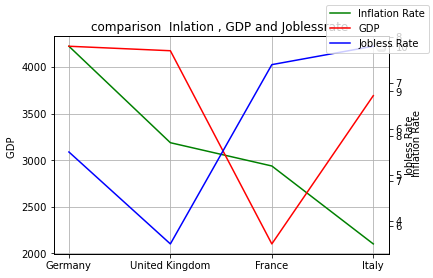

In [59]:
#start Plotting
# Multiple Projections  

fig, ax1 = plt.subplots()
ax1.set_ylabel('GDP ')
ax1.plot(country, GDP , color='green',label='Inflation Rate')
#ax1.set_ylim(0,4000000)
ax1.grid()

ax2 = ax1.twinx()  # join a second axis with the first graph we just made
ax2.set_ylabel(' Inflation Rate')
# # ax2.set_ylim(0,3000000)
ax2.plot(country,Inflation_Rate , color='red',label='GDP')

ax3 = ax1.twinx()  # join a second axis with the first graph we just made
ax3.set_ylabel('Jobless Rate')
# # ax2.set_ylim(0,3000000)
ax3.plot(country, Jobless_Rate, color='blue',label='Jobless Rate')
ax1.legend((), loc='upper right', shadow=True)
# ax1.legend(shadow=True, fancybox=True)
# plt.figure(figsize=(10,4)) 
plt.title("comparison  Inlation , GDP and Joblessrate ")
# plt.legend()
fig.legend()
plt.show()

In [66]:
# Defining Function for Top Ten Graph (Bar Chart)


def topten_barchart(x, y, color, x_label, y_label, title):
    plt.barh(x, y, color=color)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

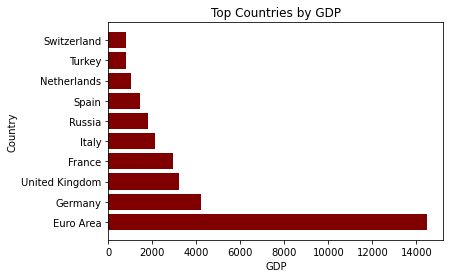

In [67]:
# Assigning values for GDP to variables for the function
x  = file.nlargest(10, "GDP")["Country"]
y = file["GDP"].nlargest(10)
color = "maroon"
x_label = "GDP"
y_label = "Country"
title = "Top Countries by GDP"

# Using Function
topten_barchart(x, y, color, x_label, y_label, title)

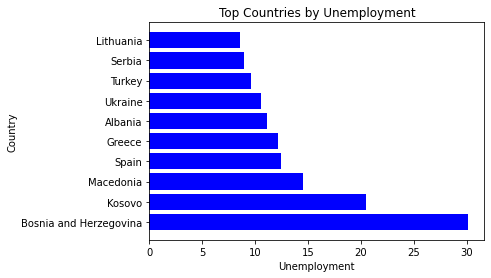

In [68]:
# Assigning values for Unemployment to variables for the function

x = file.nlargest(10, "Jobless Rate")["Country"]
y = file["Jobless Rate"].nlargest(10)
color = "blue"
x_label = "Unemployment"
y_label = "Country"
title = "Top Countries by Unemployment"

# Using Function
topten_barchart(x, y, color, x_label, y_label, title)

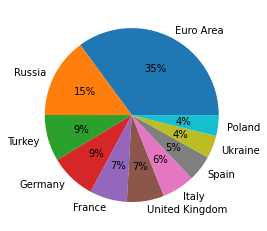

In [69]:
# Top 15 Countries by Population (Pie Chart)

x = file["Population"].nlargest(10)
y = file.nlargest(10, "Population")["Country"]

plt.pie(x, labels=y , autopct='%1.0f%%')
plt.show()